In [1]:
# importing the pandas
import pandas as pd
# importing the dataset
dataset = pd.read_csv('house_price.csv')
# printing the head
dataset.head()

,Unnamed: 0,number_of_rooms,floor,area,latitude,longitude,price
0,0,1,1,58.0,38.585834,68.793715,330000
1,1,1,14,68.0,38.522254,68.749918,340000
2,2,3,8,50.0,NaN,NaN,700000
3,3,3,14,84.0,38.520835,68.747908,700000
4,4,3,3,83.0,38.564374,68.739419,415000


In [2]:
# removing the indexed column
dataset.drop('Unnamed: 0', axis=1, inplace=True)
# removing null values
dataset.dropna(inplace=True)
# heading 
dataset.head()

,number_of_rooms,floor,area,latitude,longitude,price
0,1,1,58.0,38.585834,68.793715,330000
1,1,14,68.0,38.522254,68.749918,340000
3,3,14,84.0,38.520835,68.747908,700000
4,3,3,83.0,38.564374,68.739419,415000
5,3,4,53.0,38.530686,68.745261,513000


In [3]:
# importing the module
import plotly.express as px
# plotting scattered graph
fig = px.scatter([i for i in range(len(dataset['price']))], y=dataset['price'])
fig.show()

In [4]:
# importing the required module
from sklearn.ensemble import IsolationForest
# initializing the isolation forest
isolation_model = IsolationForest(contamination = 0.003)
# training the model 
isolation_model.fit(dataset)
# making predictions 
IF_predictions = isolation_model.predict(dataset)

c:\Users\saifu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



In [5]:
# printing
print(IF_predictions)

[1 1 1 ... 1 1 1]


In [6]:
# adding the anomalies to the dataset 
dataset['anomalies'] = IF_predictions
anomalies = dataset.query('anomalies == -1')
# importing the plot
import plotly.graph_objects as go
# plotting the graph for outliers
normal = go.Scatter(x=dataset.index.astype(str),y=dataset['price'],name="Dataset",mode='markers')
outlier = go.Scatter(x=anomalies.index.astype(str),y=anomalies['price'],name="Anomalies",mode='markers',
                marker=dict(color='red', size=6,
                            line=dict(color='red', width=1)))
# labeling the graph
layout = go.Layout(title="Isolation Forest",yaxis_title='Price',xaxis_title='x-axis',)
# plotting 
data = [normal, outlier]
fig = go.Figure(data=data, layout=layout)
fig.show()

### Training Isolation Forest Model (Reduced Set Of Features)
Let’s remove the area, the number of floors, and the number of rooms variables and train the model using only location and price information.

In [7]:
# copying the dataset 
data = dataset.copy()
# droping columns
data.drop('anomalies', axis=1, inplace=True)
data.drop('number_of_rooms', axis=1, inplace=True)
data.drop('area', axis=1, inplace=True)
data.drop('floor', axis=1, inplace=True)
# printing the head
data.head()

,latitude,longitude,price
0,38.585834,68.793715,330000
1,38.522254,68.749918,340000
3,38.520835,68.747908,700000
4,38.564374,68.739419,415000
5,38.530686,68.745261,513000


In [8]:
# initializing the isolation forest
isolation_model1= IsolationForest(contamination=0.003)
# training the model 
isolation_model1.fit(data)
# making predictions 
IF_predictions1 = isolation_model1.predict(data)

c:\Users\saifu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



In [9]:
# adding the anomalies to the dataset
data['anomalies'] = IF_predictions1
anomalies1 = data.query('anomalies == -1')
# plotting the scattered plot
normal = go.Scatter(x=data.index.astype(str),y=data['price'],name="Normal data", mode='markers')
outlier = go.Scatter(x=anomalies1.index.astype(str), y=anomalies1['price'], name="Anomalies", mode='markers',
                        marker=dict(color='red', size=5,
                            line=dict(color='red', width=1)))
# labelling
layout = go.Layout(title="Isolation Forest", yaxis_title='price',xaxis_title='x-axis',)

# plotting
Data = [normal, outlier]
fig = go.Figure(data=Data, layout=layout)
fig.show()

### Applying Isolation Forest To Classification Dataset

In [11]:
# importing the dataset
credit_card = pd.read_csv("creditcard.csv")
# heading
credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


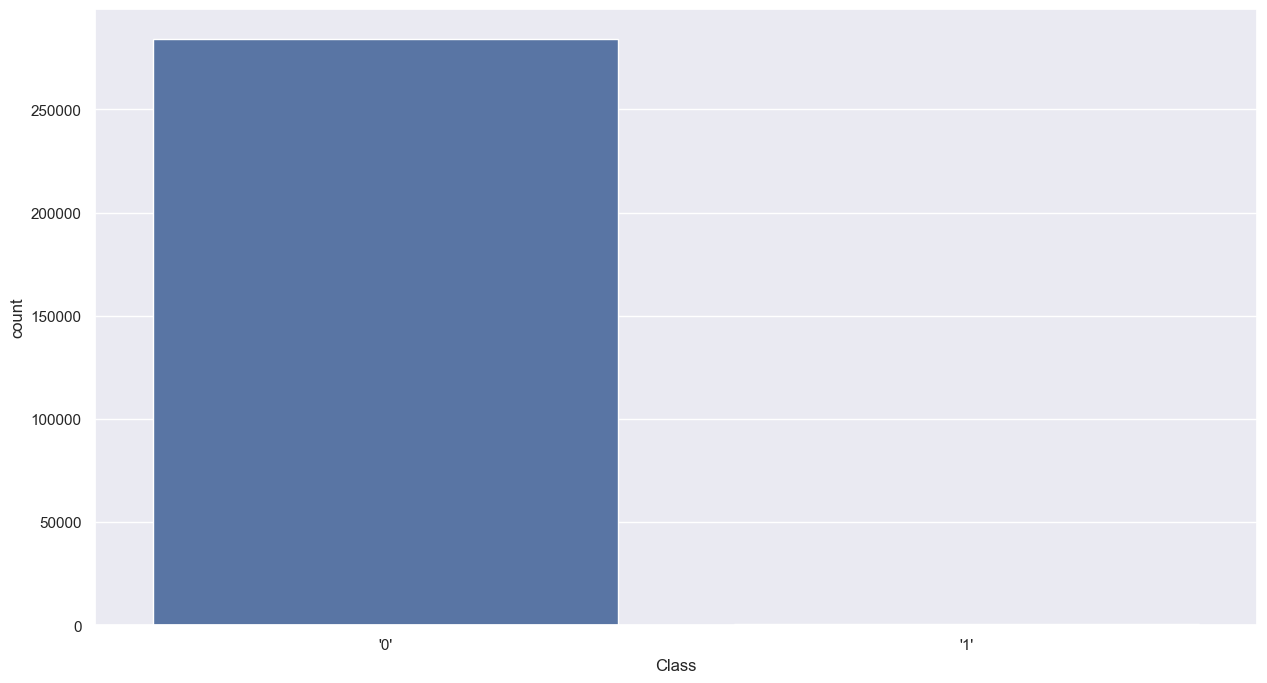

In [13]:
# importing the module
import seaborn as sns
import matplotlib.pyplot as plt 
# setting the size of plotting
sns.set(rc={'figure.figsize':(15,8)})
# plotting bar plot
sns.countplot(x='Class', data=credit_card)
plt.show()

In [14]:
# stroing the normal and fraud cases
fraud = credit_card[credit_card['Class']=="'1'"]
valid = credit_card[credit_card['Class']=="'0'"]
# printing
print("Normal transactions :", len(valid))
print("Fraud  transactions :", len(fraud))

Normal transactions : 284315
Fraud  transactions : 492


In [15]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
credit_card['Class']= label_encoder.fit_transform(credit_card['Class'])

In [16]:
# splitting the dataset into input and outputs
columns = credit_card.columns.tolist()
columns = [c for c in columns if c not in ['Class']]
X = credit_card[columns]
Y = credit_card['Class']
# importing the module
from sklearn.model_selection import train_test_split
# splitting the dataset
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = .20)

In [17]:
# initializing the model
clf = IsolationForest(max_samples=len(X_train))
# training the model
clf.fit(X_train)

IsolationForest(max_samples=227845)

In [18]:
# making predictions
y_pred = clf.predict(X_test)

In [19]:
print(y_pred)

[1 1 1 ... 1 1 1]


In [20]:
# changing the predicted values
y_pred[y_pred==1] = 0
y_pred[y_pred==-1] = 1

In [21]:
# importing the module
from sklearn.metrics import accuracy_score
# finding the accuracy
print(accuracy_score(y_pred,Y_test))

0.9972788876795057
